In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')

In [4]:
pokemon_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


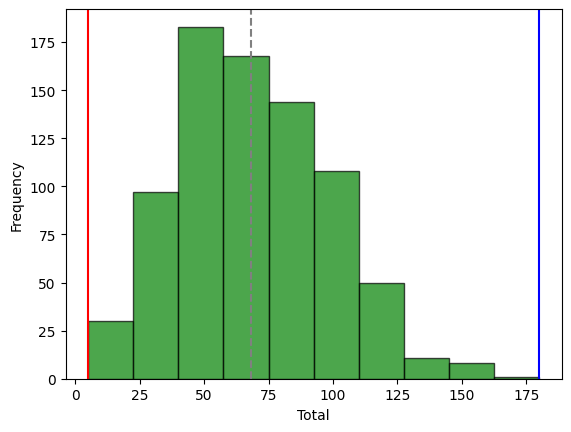

In [10]:
# Create a histogram of column 'Speed'

plt.hist(pokemon_df['Speed'], color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Total')
plt.ylabel('Frequency')

# Add min, max and mean (average) lines

plt.axvline(pokemon_df['Speed'].min(), color='red')
plt.axvline(pokemon_df['Speed'].max(), color='blue')
plt.axvline(pokemon_df['Speed'].mean(), color='gray', linestyle='dashed')


Text(0.5, 1.0, 'Attack vs Defense')

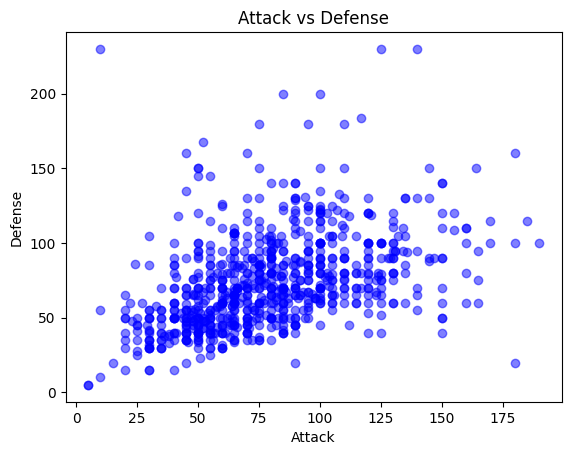

In [15]:
# Scatter plot between: 'Attack' and 'Defense'

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color='blue', alpha=0.5)   # x first, and y second
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense')

Text(0.5, 1.0, 'Speed vs Defense')

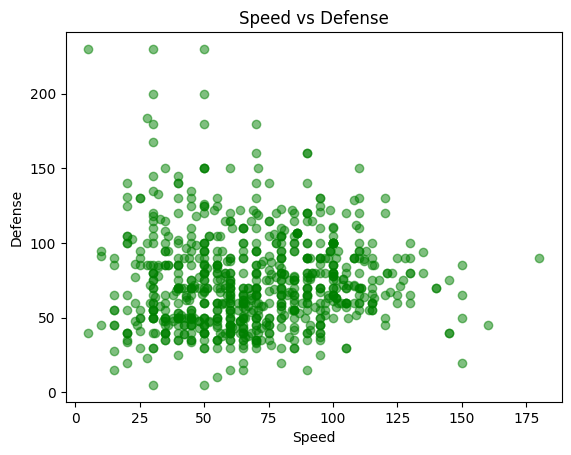

In [16]:
# Scatter plot for 'Speed' and 'Defense'

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color='green', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Speed vs Defense')

Text(0.5, 1.0, 'HP vs Defense')

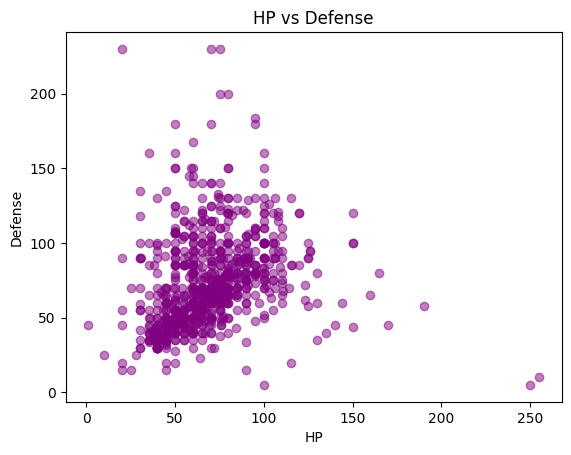

In [19]:
# Scatter plot between: 'HP' and 'Defense'

plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color='purple', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('HP vs Defense')

The correlation coefficient indicates the strength and direction of the statistical relationship between two variables. The coefficient ranges from -1 to 1, with a value of 0.43 signifying a positive but moderately strong relationship between the two variables.

A positive correlation coefficient means that the variables increase together. Therefore, as one variable increases, the other also tends to increase, and vice versa.
The closer the correlation coefficient is to 1, the stronger the positive relationship.
A correlation coefficient of 0.43 is not very high, but it indicates a moderately positive relationship.
If the correlation coefficient were negative, it would suggest that as one variable increases, the other variable decreases.
A correlation coefficient of -1 indicates a perfect negative relationship.
Thus, a correlation coefficient of 0.43 might suggest that, for example, as Pokémon's Attack values increase, their Defense values tend to increase as well, but the relationship is not very strong.

In [ ]:
# PEARSON CORRELATION
# Result will be between -1 and 1.
# -1 perfect negative relationship
#  1 perfect positive relation



In [21]:
# Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
print(correlation1)

0.4386870551184892


In [22]:
# Pearson correlation between Speed/Defense

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print(correlation2)

0.015226598088597448


In [23]:
# Pearson correlation between HP/Defense

correlation3 = pokemon_df['HP'].corr(pokemon_df['Defense'])
print(correlation3)

0.2396223188467258


In [32]:
# Select only numeric columns
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)

# For loop for Attack ver table columns
for column in numeric_columns.columns:
  # remove 'Attack' column from comparison
  if column == 'Attack':
    continue
  # Calculate correlation between Attack and column
  else:
    correlation = pokemon_df['Attack'].corr(pokemon_df[column])
    print(f"Correlation between Attack and {column}: {correlation}")

# Save result in dictionary
target_column = 'Attack'
correlation_results = {} # key=column, val=pearson_correlation
for column in numeric_columns.columns:
  if column == target_column:
    continue
    #else: - dont have to be present
  correlation = pokemon_df['Attack'].corr(pokemon_df[column])
  correlation_results[column] = correlation

print(correlation_results)

Correlation between Attack and Total: 0.7362106519949293
Correlation between Attack and HP: 0.422386028776223
Correlation between Attack and Defense: 0.4386870551184892
Correlation between Attack and Sp. Atk: 0.396361755349232
Correlation between Attack and Sp. Def: 0.26398955110108846
Correlation between Attack and Speed: 0.38123973924108967
Correlation between Attack and Generation: 0.051451336708469686
{'Total': 0.7362106519949293, 'HP': 0.422386028776223, 'Defense': 0.4386870551184892, 'Sp. Atk': 0.396361755349232, 'Sp. Def': 0.26398955110108846, 'Speed': 0.38123973924108967, 'Generation': 0.051451336708469686}


In [33]:
# CORRELATION MATRIX

correlation_matrix = numeric_columns.corr() # all columns are numeric
print(correlation_matrix)

               Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
Total       1.000000  0.618748  0.736211  0.612787  0.747250  0.717609   
HP          0.618748  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.736211  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.612787  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.747250  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.717609  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.575943  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.048384  0.058683  0.051451  0.042419  0.036437  0.028486   

               Speed  Generation  
Total       0.575943    0.048384  
HP          0.175952    0.058683  
Attack      0.381240    0.051451  
Defense     0.015227    0.042419  
Sp. Atk     0.473018    0.036437  
Sp. Def     0.259133    0.028486  
Speed       1.000000   -0.023121  
Generation -0.023121    1.000000  


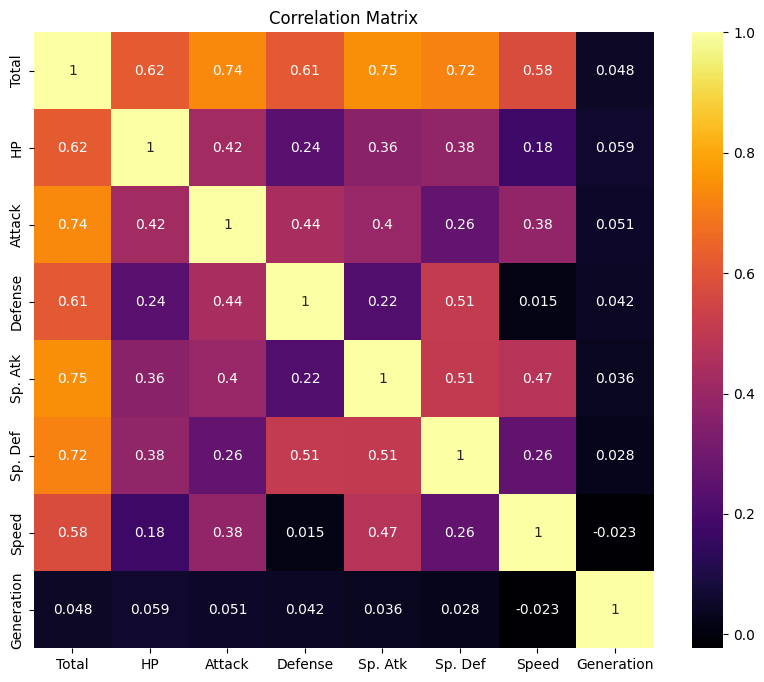

In [40]:
# Vizualizing matrix with seaborn

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno") # annotation - adds values
plt.title('Correlation Matrix')
plt.show()


<Axes: xlabel='Attack', ylabel='Defense'>

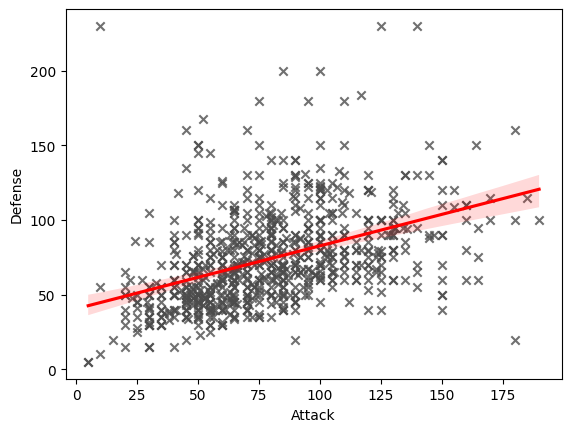

In [43]:
# LINEAR REGRESSION
# (predict one value based on the other)

#sns.regplot(x='Attack', y='Defense', data=pokemon_df)
sns.regplot(
    data=pokemon_df, x="Attack", y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)



Text(0.5, 1.0, 'Speed vs Defense')

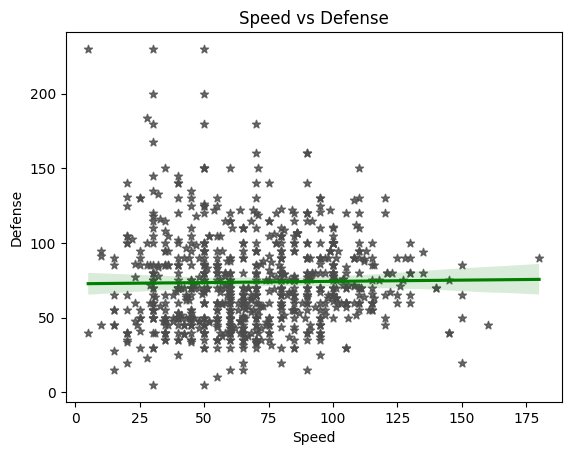

In [61]:
# Regressin plot between Speed/Defense

sns.regplot(
    data=pokemon_df, x="Speed", y="Defense",
    ci=99, marker="*", color="0.3", line_kws=dict(color="g"),
)
plt.title('Speed vs Defense')

Text(0.5, 1.0, 'Speed vs Defense')

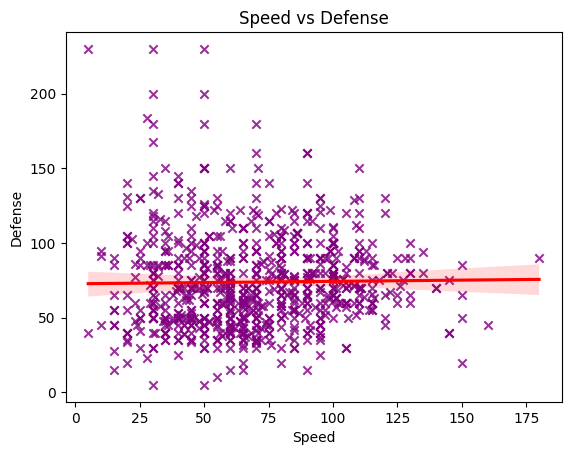

In [63]:
sns.regplot(x='Speed', y='Defense', data=pokemon_df, color='purple', ci=99, marker='x', line_kws={'color':'red'})
plt.title('Speed vs Defense')

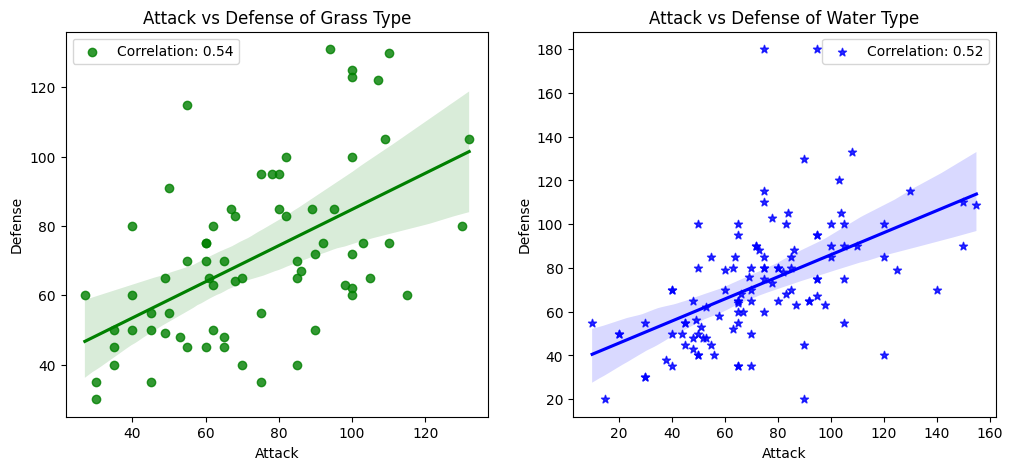

In [28]:
'''
Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
1. Create two DataFrame Grass and Water
2. Create the regression plots for each (Grass and Water)
3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
'''
# 1. Create two DataFrame Grass and Water
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon_df = pd.read_csv('/content/Pokemon.csv')
grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass']
water_df = pokemon_df[pokemon_df['Type 1'] == 'Water']

# 3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)

correlation_grass = grass_df['Attack'].corr(grass_df['Defense']).round(2)
correlation_water = water_df['Attack'].corr(water_df['Defense']).round(2)

# 2. Create the regression plots for each (Grass and Water)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='Attack', y='Defense', data=grass_df, color='green', ci=99, marker='o', line_kws={'color':'green'}, label=f"Correlation: {correlation_grass}")
plt.title('Attack vs Defense of Grass Type')
plt.legend()
plt.subplot(1, 2, 2)
sns.regplot(x='Attack', y='Defense', data=water_df, color='blue', ci=99, marker='*', line_kws={'color':'blue'}, label=f"Correlation: {correlation_water}")
plt.title('Attack vs Defense of Water Type')
plt.legend()
plt.show()

Pearson correlation coefficient between Attack and Defense for Grass Type pokemons: 0.5407436570609248
Pearson correlation coefficient between Attack and Defense for Water Type pokemons: 0.5161628601933552


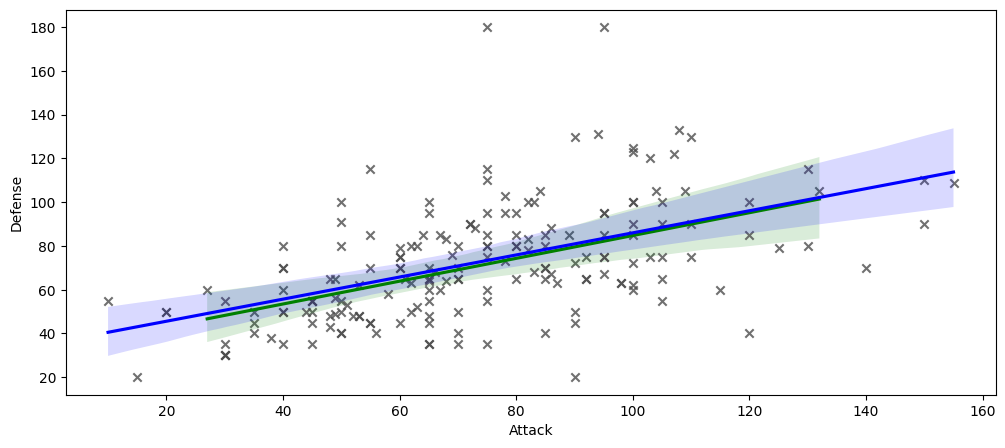

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon_df = pd.read_csv('/content/Pokemon.csv')

grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass']
water_df = pokemon_df[pokemon_df['Type 1'] == 'Water']

plt.figure(figsize=(12, 5))

#plt.subplot(1, 2, 1)
sns.regplot(x = 'Attack', y = 'Defense', data = grass_df, ci = 99, marker = "x", color = "0.3", line_kws = dict(color = "g"))
correlation_grass = grass_df['Attack'].corr(grass_df['Defense'])
print('Pearson correlation coefficient between Attack and Defense for Grass Type pokemons:', correlation_grass)

#plt.subplot(1, 2, 2)
sns.regplot(x = 'Attack', y = 'Defense', data = water_df, ci = 99, marker = "x", color = "0.3", line_kws = dict(color = "b"))
correlation_water = water_df['Attack'].corr(water_df['Defense'])
print('Pearson correlation coefficient between Attack and Defense for Water Type pokemons:', correlation_water)